In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [55]:
df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,14.0,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,6.0,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,1.0,Assassination,NaN,NaN,NaN,NaN,10.0,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0.0,NaN,NaN,1.0,1.0,1.0,0.0,NaN,NaN,0.0,1.0,0.0,3.0,Bombing/Explosion,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0.0,NaN,NaN,1.0,1.0,1.0,-9.0,NaN,NaN,0.0,1.0,0.0,7.0,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7.0,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74731 entries, 0 to 74730
Columns: 135 entries, eventid to related
dtypes: float64(61), int64(16), object(58)
memory usage: 77.0+ MB


In [10]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [11]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [12]:
df = df[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [13]:
df.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [15]:
df.shape

(74731, 18)

In [17]:
df.isnull().sum()

Year              0
Month             0
day               0
Country           0
State           413
Region            0
City              0
latitude       3804
longitude      3805
Attacktype        0
kill           6237
Wound          8678
target1         474
summary       66129
Group             1
Targettype        1
Weapon            1
motive        66441
dtype: int64

In [20]:
df['Wound'] = df['Wound'].fillna(0)
df['kill'] = df['kill'].fillna(0)

In [22]:
df['Casualities'] = df['kill'] + df['Wound']

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74731 entries, 0 to 74730
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         74731 non-null  int64  
 1   Month        74731 non-null  int64  
 2   day          74731 non-null  int64  
 3   Country      74731 non-null  object 
 4   State        74318 non-null  object 
 5   Region       74731 non-null  object 
 6   City         74731 non-null  object 
 7   latitude     70927 non-null  float64
 8   longitude    70926 non-null  float64
 9   Attacktype   74731 non-null  object 
 10  kill         74731 non-null  float64
 11  Wound        74731 non-null  float64
 12  target1      74257 non-null  object 
 13  summary      8602 non-null   object 
 14  Group        74730 non-null  object 
 15  Targettype   74730 non-null  object 
 16  Weapon       74730 non-null  object 
 17  motive       8290 non-null   object 
 18  Casualities  74731 non-null  float64
dtypes: f

In [24]:
df.describe()

,Year,Month,day,latitude,longitude,kill,Wound,Casualities
count,74731.000000,74731.000000,74731.000000,70927.000000,7.092600e+04,74731.000000,74731.000000,74731.000000
mean,1988.141133,6.466834,15.353321,18.999599,-1.224097e+03,2.099637,2.280339,4.379976
std,7.319151,3.388993,8.819473,23.960769,3.236186e+05,12.014744,50.612703,58.177708
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1983.000000,4.000000,8.000000,6.242026,-7.537416e+01,0.000000,0.000000,0.000000
50%,1989.000000,6.000000,15.000000,18.238724,-1.549805e+00,0.000000,0.000000,0.000000
75%,1994.000000,9.000000,23.000000,38.552185,3.530125e+01,1.000000,0.000000,2.000000
max,2002.000000,12.000000,31.000000,74.633553,1.793667e+02,1384.000000,8191.000000,9574.000000


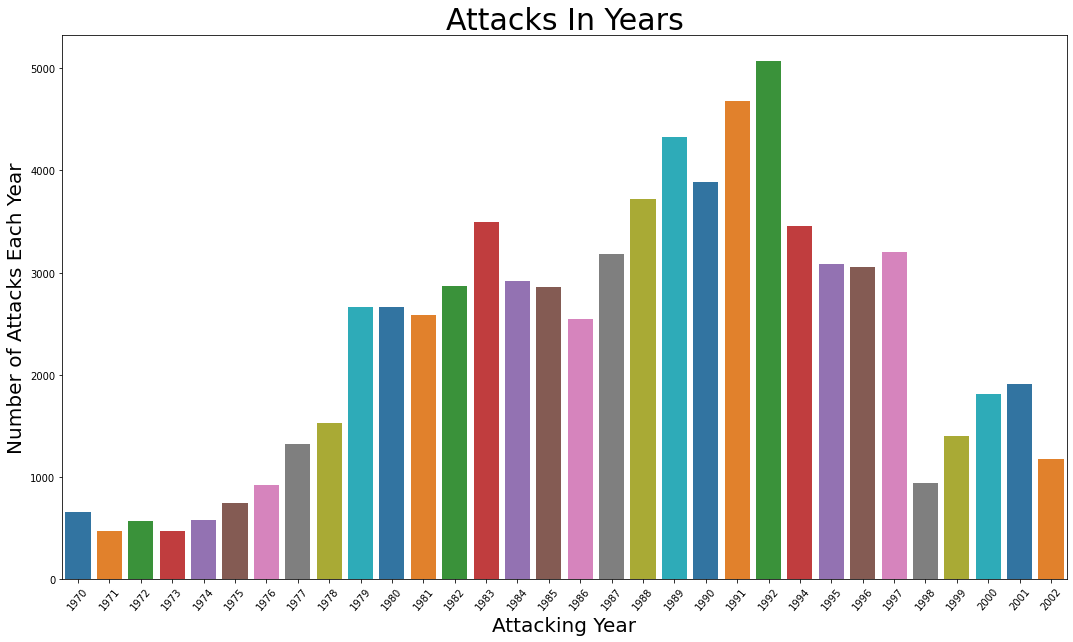

In [25]:

year = df['Year'].unique()
years_count = df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = year,
           y = years_count,
           palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Attacks In Years',fontsize=30)
plt.show()

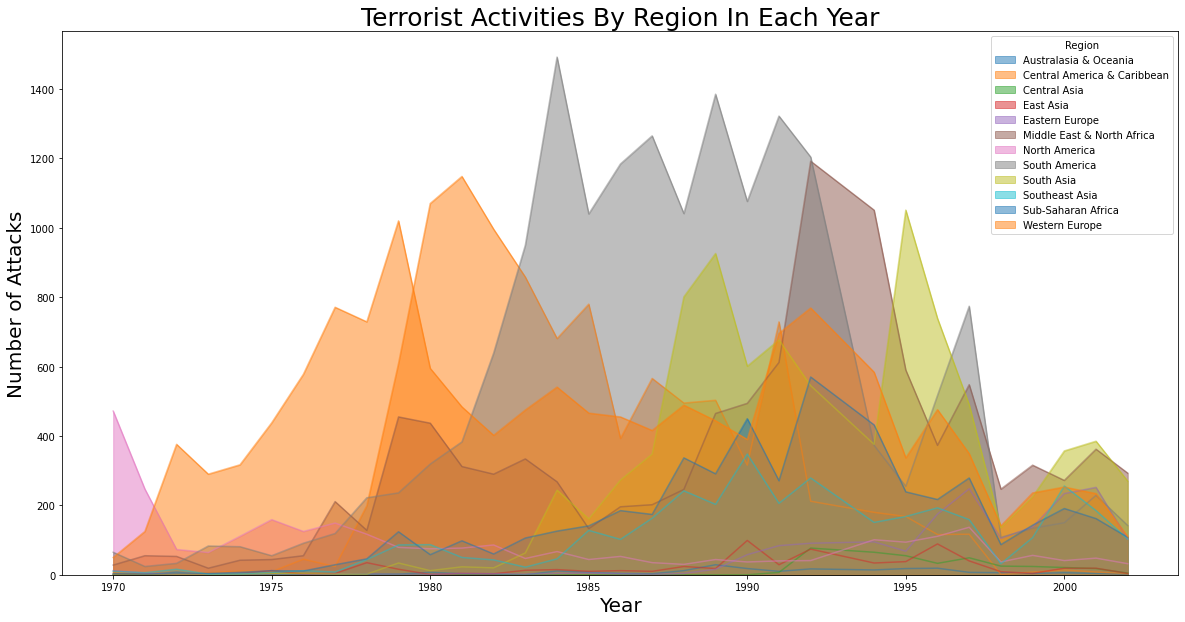

In [28]:
pd.crosstab(df.Year, df.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

In [30]:
attack = df.Country.value_counts()[:10]
attack

Colombia          6682
Peru              6031
El Salvador       5320
United Kingdom    4349
India             3605
Spain             3057
Turkey            2548
United States     2466
France            2330
Chile             2276
Name: Country, dtype: int64

In [31]:
df.Group.value_counts()[1:10]

Shining Path (SL)                                   4507
Farabundo Marti National Liberation Front (FMLN)    3351
Irish Republican Army (IRA)                         2663
Basque Fatherland and Freedom (ETA)                 1897
Revolutionary Armed Forces of Colombia (FARC)       1462
National Liberation Army of Colombia (ELN)          1246
Palestinians                                        1125
Liberation Tigers of Tamil Eelam (LTTE)             1106
Kurdistan Workers' Party (PKK)                      1077
Name: Group, dtype: int64

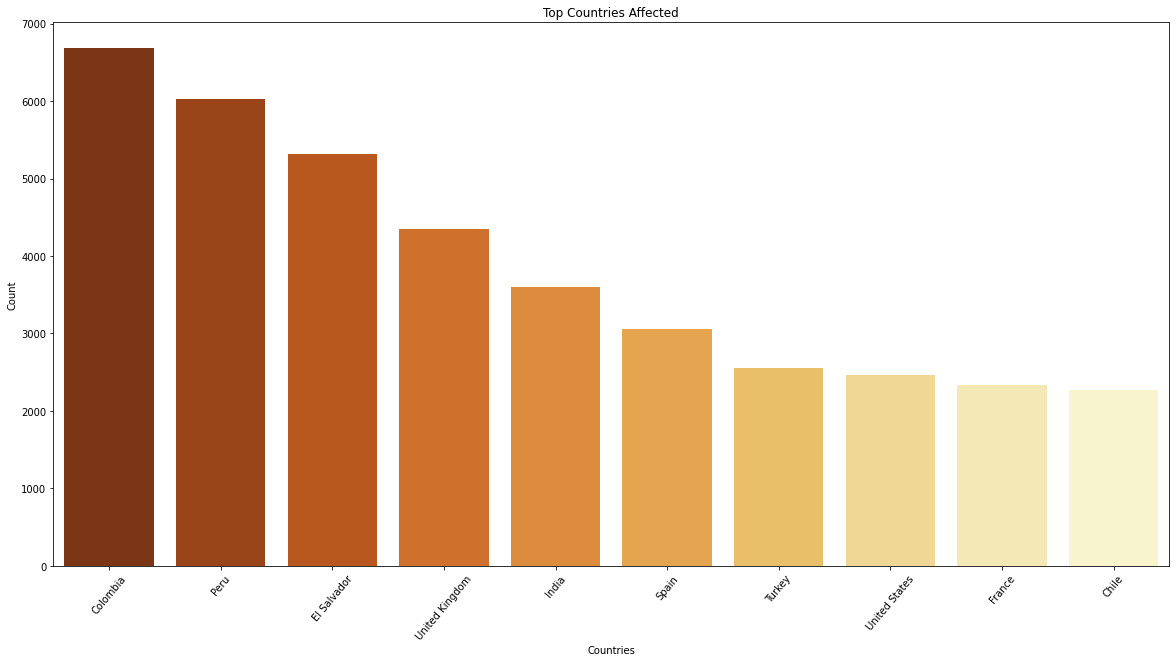

In [32]:
plt.subplots(figsize=(20,10))
sns.barplot(df['Country'].value_counts()[:10].index,df['Country'].value_counts()[:10].values,palette='YlOrBr_r')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 50)
plt.show()

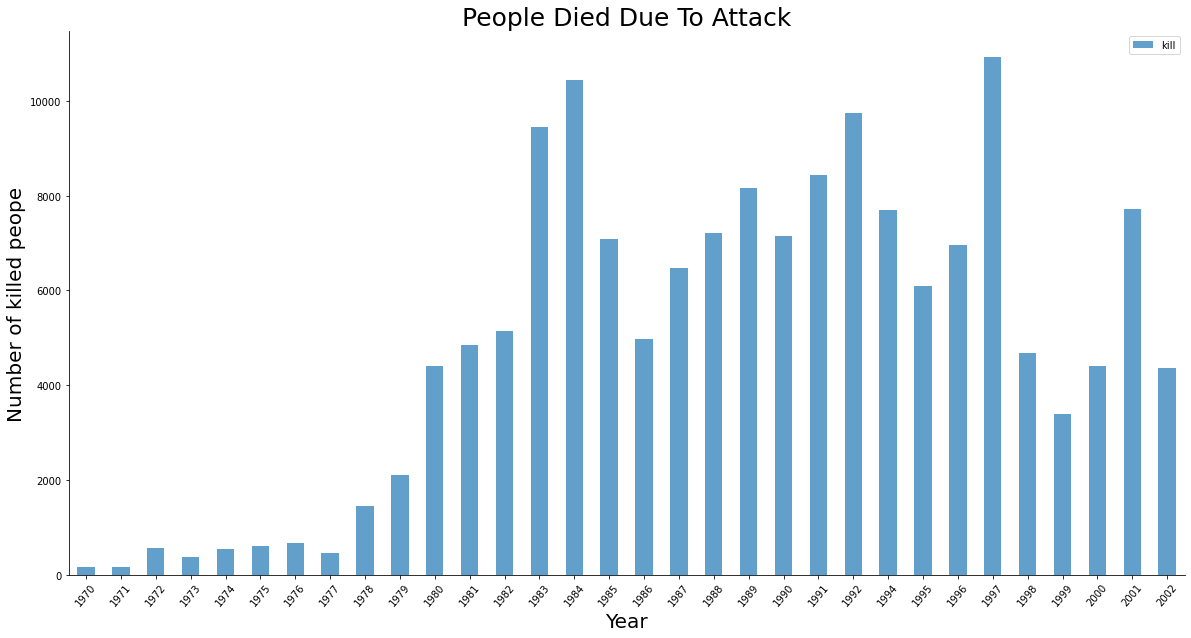

In [33]:
data = df[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
data.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 50)
plt.title("People Died Due To Attack",fontsize=25)
plt.ylabel("Number of killed peope",fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)

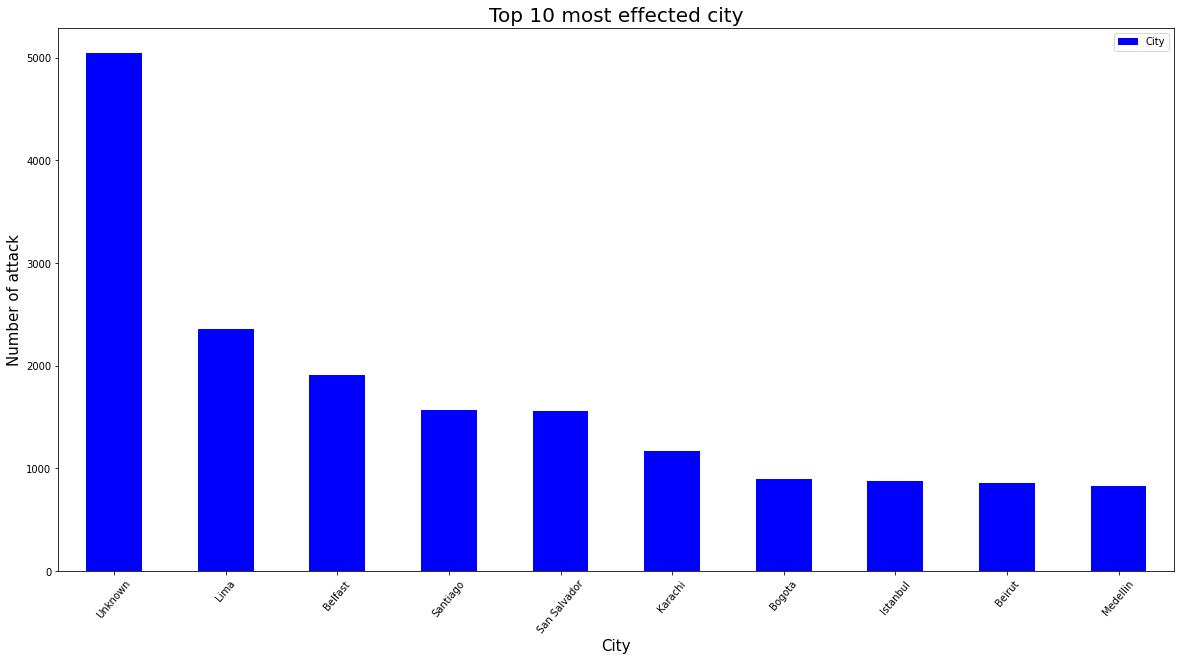

In [34]:
df['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='blue')
plt.xticks(rotation = 50)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 most effected city",fontsize=20)
plt.show()

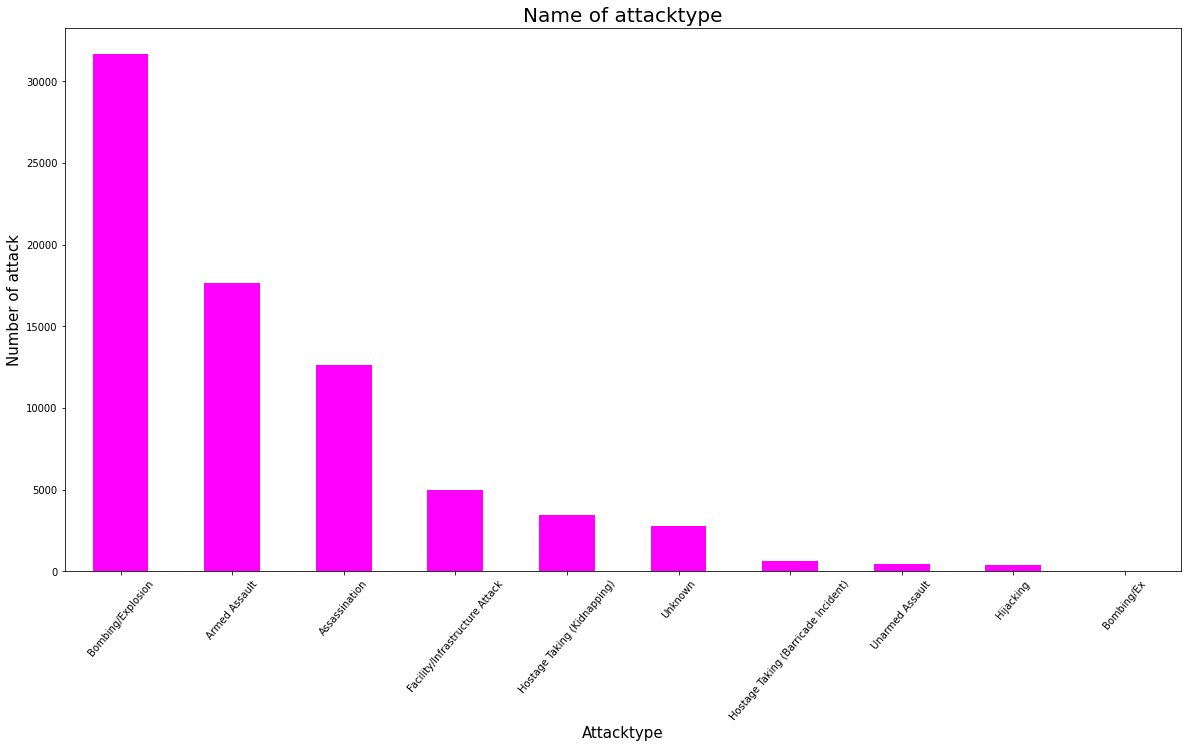

In [35]:
df['Attacktype'].value_counts().plot(kind='bar',figsize=(20,10),color='magenta')
plt.xticks(rotation = 50)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Name of attacktype",fontsize=20)
plt.show()

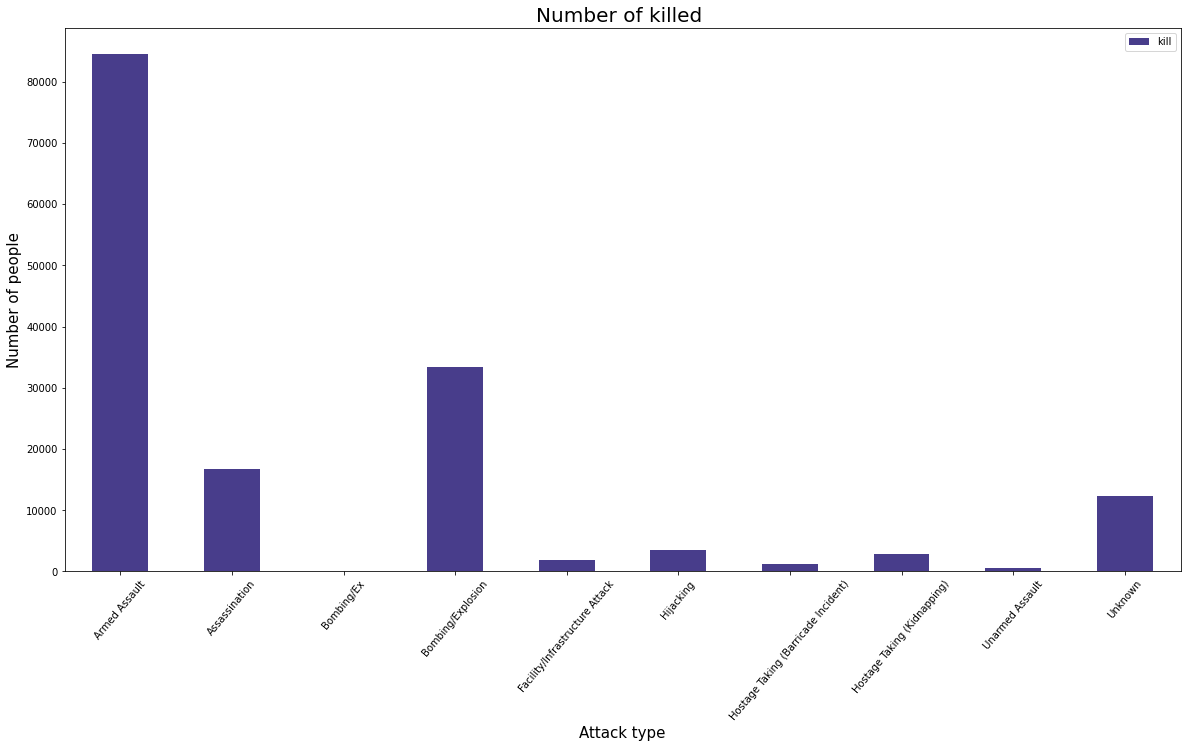

In [36]:
df[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['darkslateblue'])
plt.xticks(rotation=50)
plt.title("Number of killed ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

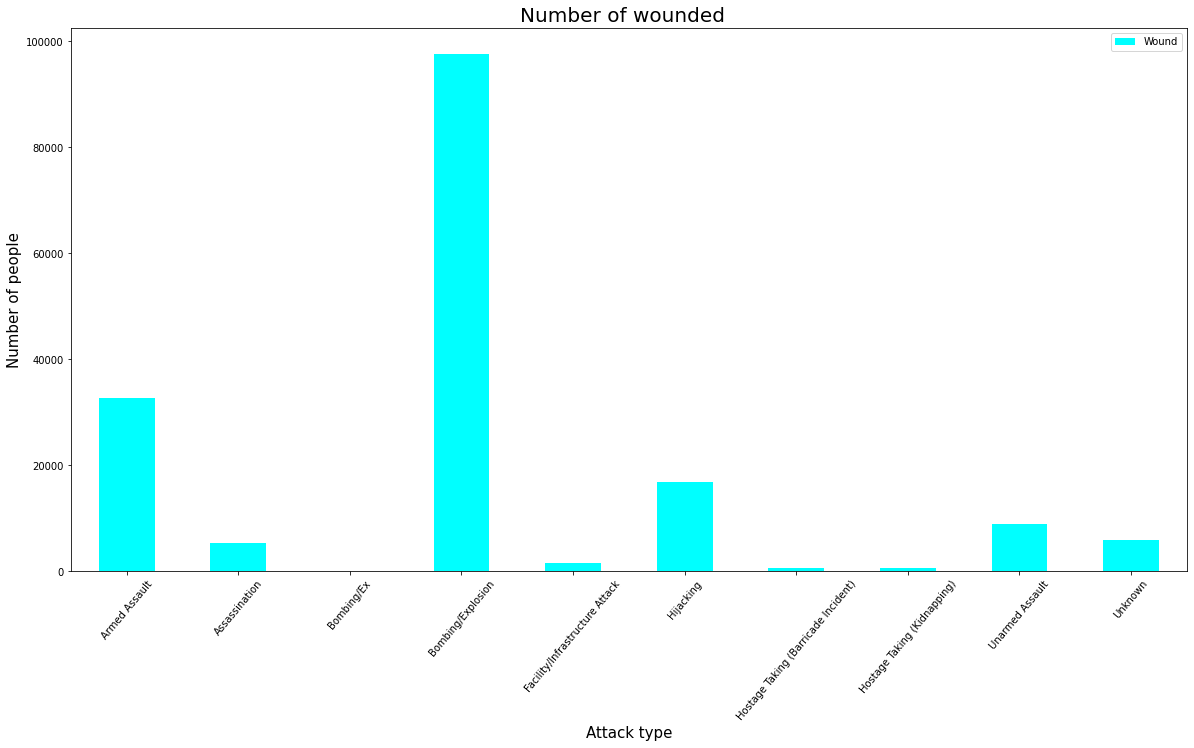

In [37]:
df[['Attacktype','Wound']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['cyan'])
plt.xticks(rotation=50)
plt.title("Number of wounded  ",fontsize=20)
plt.ylabel('Number of people',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
plt.show()

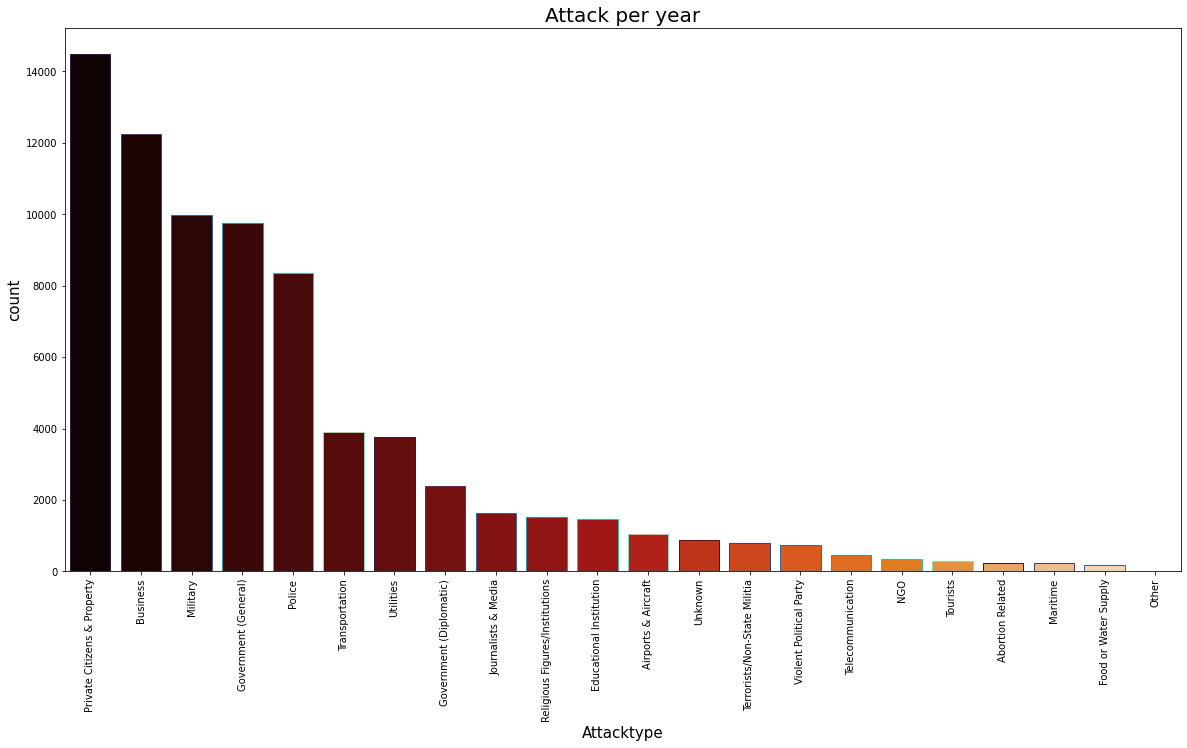

In [41]:
plt.subplots(figsize=(20,10))
sns.countplot(df["Targettype"],order=df['Targettype'].value_counts().index,palette="gist_heat",edgecolor=sns.color_palette("mako"));
plt.xticks(rotation=90)
plt.xlabel("Attacktype",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Attack per year",fontsize=20)
plt.show()

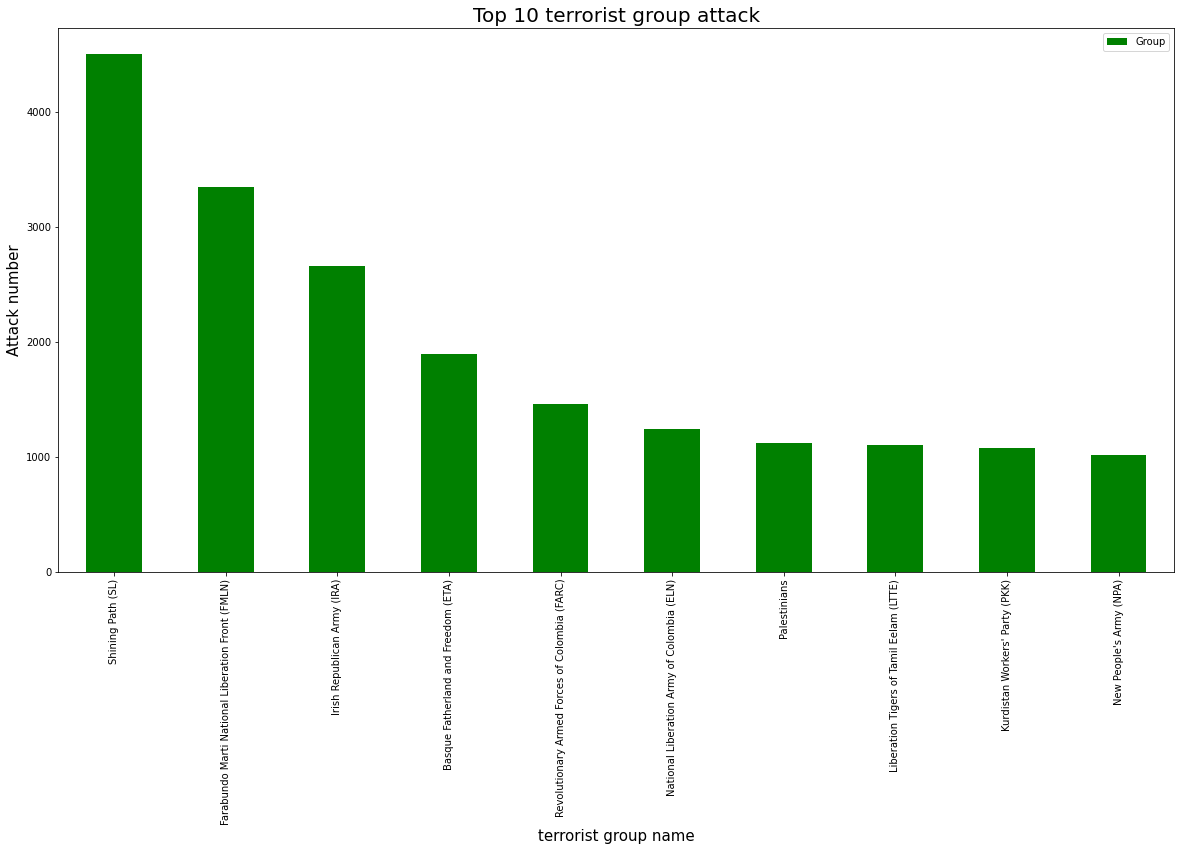

In [42]:
df['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='green',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

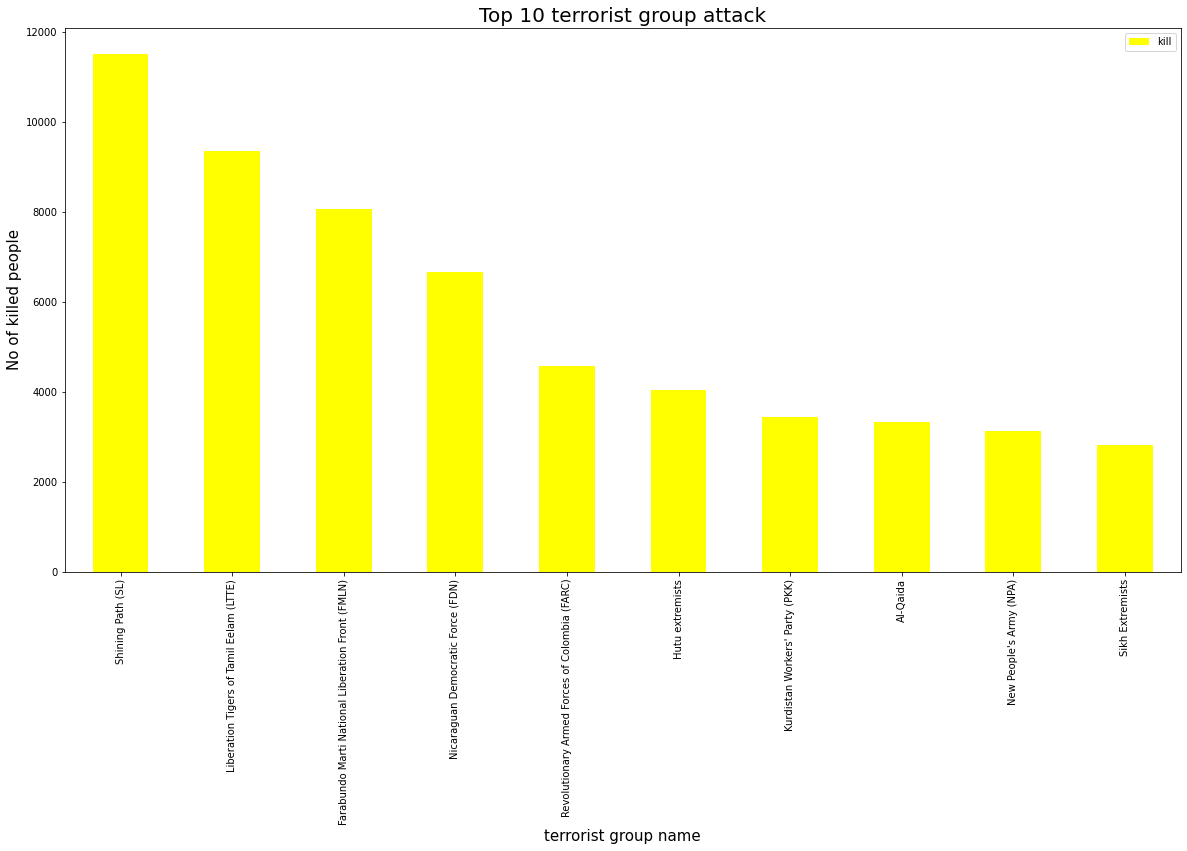

In [43]:
df[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',color='yellow',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("No of killed people",fontsize=15)
plt.show()

In [44]:
data=df[['Group','Country','kill']]
data=data.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
data

,Group,Country,kill
0,Shining Path (SL),Peru,11512.0
1,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,9324.0
2,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
3,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
4,Revolutionary Armed Forces of Colombia (FARC),Colombia,4554.0
5,Kurdistan Workers' Party (PKK),Turkey,3340.0
6,New People's Army (NPA),Philippines,3130.0
7,Al-Qaida,United States,3001.0
8,National Union for the Total Independence of A...,Angola,2700.0
9,Sikh Extremists,India,2476.0


In [45]:
kill = df.loc[:,'kill']
print('Number of people killed by terror attack:', int(sum(kill.dropna())))

Number of people killed by terror attack: 156908


In [46]:
typeKill = df.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
typeKill

Attacktype,Armed Assault,Assassination,Bombing/Ex,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,84564.0,16695.0,0.0,33436.0,1795.0,3483.0,1154.0,2871.0,634.0,12276.0


In [47]:
countryKill = data.pivot_table(columns='Country', values='kill', aggfunc='sum')
countryKill

Country,Angola,Colombia,El Salvador,India,Nicaragua,Peru,Philippines,Sri Lanka,Turkey,United States
kill,2700.0,4554.0,8019.0,2476.0,6630.0,11512.0,3130.0,9324.0,3340.0,3001.0


Conclusion and Results :

Country with the most attacks: Colombia

City with the most attacks: Lima

Region with the most attacks: Middle East & North Africa

Year with the most attacks: 1992

Month with the most attacks: 5

Group with the most attacks: Shining Path

Most Attack Types: Bombing/Explosion

Thank You!